In [1]:
def fit (X_train, Y_train):
    num = (X_train.mean() * Y_train.mean() - (X_train*Y_train).mean())
    den = X_train.mean()**2 - (X_train**2).mean()
    m = num/den
    b = Y_train.mean() - m *X_train.mean()
    return m,b

def predict(X_test, m , b):
    return X_test*m + b

def cost(Y_true, Y_pred):
    return ((Y_true - Y_pred)**2).sum()

def score(Y_true, Y_pred):
    num = ((Y_true-Y_pred)**2).sum()
    den = ((Y_true - Y_true.mean()) ** 2).sum()
    return 1 - num/den

#X_train, Y_train, X_test, Y_test
m,b = fit(X_train, Y_train)
Y_pred = predict(X_test, m , b)


NameError: name 'X_train' is not defined

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def step_gradient(points, learning_rate, b_current, m_current):
    m_slope = 0
    b_slope = 0
    N = len(points)
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        b_slope += -(2/N) * (y - m_current* x - b_current)
        m_slope += -(2/N) * (y - m_current* x - b_current)*x
   
    new_m = m_current - learning_rate * m_slope
    new_b = b_current - learning_rate* b_slope
    
    
    return (new_b, new_m)


def cost_gd(b, m , points):
    total_cost = 0
    for i in range(len(points)):
        x = points[i,0]
        y = points[i, 1]
        total_cost += (y - (m*x + b))**2
    return total_cost/len(points)

def gd_runner(points, learning_rate = 0.0001, num_iterations = 1000):
    b = 0
    m = 0
    cost_i=[0]
    num_i=[0]
    print ("Start: ", cost_gd(b, m , points))
    for i in range(num_iterations):
        b, m = step_gradient(points, learning_rate, b, m)
        num_i.append(i)
        cost_i.append(cost_gd(b,m,points))
    plt.plot(cost_i,num_i)
    plt.show()
    print ("FINAL: ", cost_gd(b, m , points))
    graph(points,b,m)
    print(cost_i)
    return (b, m)

def run():
    points = np.loadtxt(open("data.csv", "rb"), delimiter=",")
    learning_rate = 0.0001
    num_iterations = 10
    final_b, final_m = gd_runner(points, learning_rate, num_iterations)
    print(final_b, final_m)
    
    

def graph(points,b,m):
    plt.scatter(points[:,0],points[:,1])
    line = []
    for i in range(len(points)):
        line.append(m*i+b) 
    plt.plot(points[:,0],line)
    plt.show()
    

Start:  5565.10783448


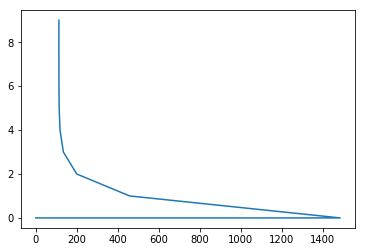

FINAL:  112.655851815


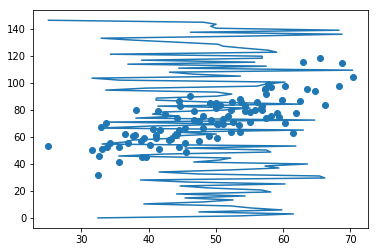

[0, 1484.5865574086486, 457.85425757376731, 199.50998572553894, 134.50591058200533, 118.14969342239947, 114.03414906038149, 112.99857731713661, 112.7379818756847, 112.67238435909097, 112.65585181499748]
0.0296393478747 1.47741737555


In [6]:
run()

In [8]:
points = np.loadtxt(open("data.csv", "rb"), delimiter=",")
points

array([[  32.50234527,   31.70700585],
       [  53.42680403,   68.77759598],
       [  61.53035803,   62.5623823 ],
       [  47.47563963,   71.54663223],
       [  59.81320787,   87.23092513],
       [  55.14218841,   78.21151827],
       [  52.21179669,   79.64197305],
       [  39.29956669,   59.17148932],
       [  48.10504169,   75.3312423 ],
       [  52.55001444,   71.30087989],
       [  45.41973014,   55.16567715],
       [  54.35163488,   82.47884676],
       [  44.1640495 ,   62.00892325],
       [  58.16847072,   75.39287043],
       [  56.72720806,   81.43619216],
       [  48.95588857,   60.72360244],
       [  44.68719623,   82.89250373],
       [  60.29732685,   97.37989686],
       [  45.61864377,   48.84715332],
       [  38.81681754,   56.87721319],
       [  66.18981661,   83.87856466],
       [  65.41605175,  118.5912173 ],
       [  47.48120861,   57.25181946],
       [  41.57564262,   51.39174408],
       [  51.84518691,   75.38065167],
       [  59.37082201,   

In [10]:
import pandas as pd
titanic = pd.read_csv("data.csv")
titanic

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
5,52.211797,79.641973
6,39.299567,59.171489
7,48.105042,75.331242
8,52.550014,71.300880
9,45.419730,55.165677
